# SYDE 552: Assignment 2

Due: Monday, Feb 24, 2020

This assignment can be done in groups of up to 2.

The purpose of this assignment is to train some deep networks to recognize images.  We will start with MNIST (the standard hand-written numbers dataset) and then go on to the harder CIFAR-10 (recognizing pictures in 10 categories).

All of these datasets are publically available, and you can technically use whatever programming language you want to do the deep network, but we *highly* recommend using the Python package `tensorflow`.  It has become the industry standard.  You can use other systems if you would like, as pretty much any deep learning library should support the aspects covered in this assignment.  We'd also recommend using the most recent version (Tensorflow 2).  On most python systems this can be installed with:

```
pip install tensorflow
```

For more information on installing, see https://www.tensorflow.org/install

For this assignment, you will not need to install the GPU version of `tensorflow`.  If you want to work with larger deep learning models and make things run faster (for your project, for example), then instructions for doing so are at https://www.tensorflow.org/install/gpu

This assignment sheet is a Jupyter Notebook file https://jupyter.org/ which you can use if you want as a starting point.

## Part 1: MNIST

First, we download the data files.  They are already split into a training set and a test set.

In [0]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0   # rescale the images to be between 0 and 1
x_test = x_test / 255.0     # rescale the images to be between 0 and 1

11493376/11490434 [==============================] - 0s 0us/step


Let's show the first 10 training images and their category labels.

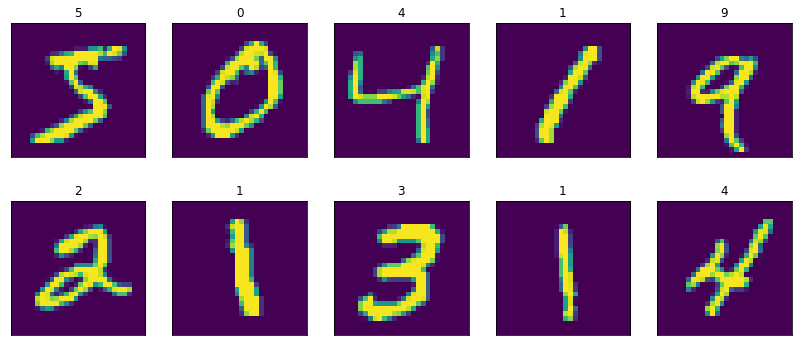

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title('%d' % y_train[i])
plt.show()

The `y_train` and `y_target` values are currently integers (0 to 9).  The output from our network is a vector where one value should be 1 and the others should be 0, so we need to convert to that format.  (Note: there is a special loss function `sparse_categorical_crossentropy` that automatically converts for us.  We'll use that later, but for now do this manually, just to keep things clear.)

In [0]:
import numpy as np

y_train_target = np.eye(10)[y_train]
y_test_target = np.eye(10)[y_test]
print('original target:', y_train[0])
print('  vector target:', y_train_target[0])

original target: 5
  vector target: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Now we define the model using Keras https://keras.io/, which is meant for being able to quickly define all the different structures you might want to add to your network. We use `Sequential` to indicate that this is just a big feed-forward network, and we define each layer in turn.  `Dense` is a layer where all the components are connected to all of the previous layer's outputs.

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
  tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
  tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
])

# define what we want to minimize (the thing that we take the derivative of to get the weight changes)
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

model.compile(optimizer=tf.keras.optimizers.SGD(lr = 0.1), # use stochastic gradient descent
              loss=my_loss,
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Before doing any training, let's see how well it performs.

In [0]:
loss, accuracy = model.evaluate(x_test,  y_test_target)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.1135 - acc: 0.0731


As expected, it's pretty bad, since we haven't done any training yet.  The accuracy is near 10%, which is what we would expect by chance.  But what actual numbers is it outputting?

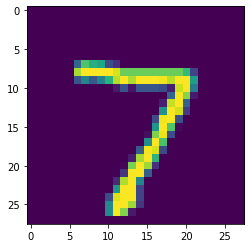

actual output from network: [0.         0.         0.0640714  0.         0.         0.5571035
 0.         0.29118222 0.         0.41771555]
category (the largest output): 5


In [0]:
output = model.predict(x_test)
category = np.argmax(output, axis=1)

plt.imshow(x_test[0])
plt.show()
print('actual output from network:', output[0])
print('category (the largest output):', category[0])

So it currently thinks the first image in the test dataset is is a 1, when it should actually be a 7.  

Now let's try training the model.  We'll just do 5 epochs of training (5 times through all the training data).  While it is training, we also tell it to see how well the model is performing on the testing data (technically this is considered to be validation data).

In [0]:
model.fit(x_train, y_train_target, epochs=5, validation_data=(x_test, y_test_target));

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0314 - acc: 0.8265 - val_loss: 0.0208 - val_acc: 0.9017
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0192 - acc: 0.9117 - val_loss: 0.0168 - val_acc: 0.9239
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0164 - acc: 0.9250 - val_loss: 0.0151 - val_acc: 0.9314
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0149 - acc: 0.9330 - val_loss: 0.0139 - val_acc: 0.9366
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0138 - acc: 0.9389 - val_loss: 0.0133 - val_acc: 0.9411


We can plot the categorization accuracy over time and the error over time for both the training set and the test set.

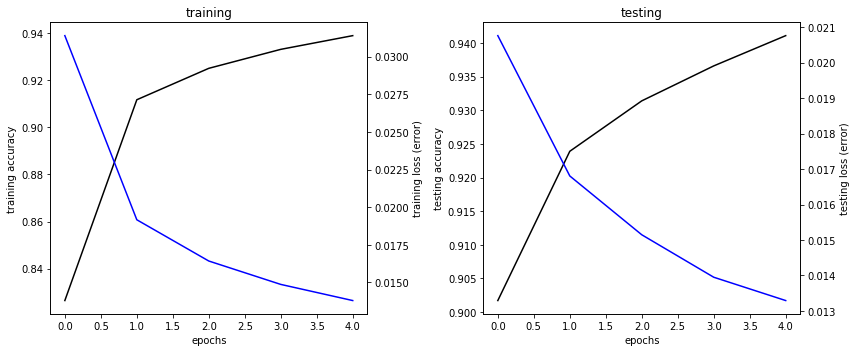

In [0]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['acc'], c='k')
plt.ylabel('training accuracy')
plt.xlabel('epochs')
plt.twinx()
plt.plot(model.history.history['loss'], c='b')
plt.ylabel('training loss (error)')
plt.title('training')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_acc'], c='k')
plt.ylabel('testing accuracy')
plt.xlabel('epochs')
plt.twinx()
plt.plot(model.history.history['val_loss'], c='b')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.tight_layout()
plt.show()

Now let's see how well it performs on the test set.

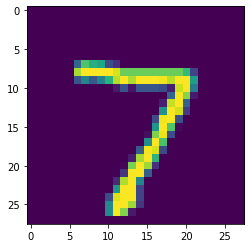

actual output from network: [0.        0.        0.        0.        0.        0.        0.
 0.8212518 0.        0.       ]
category (the largest output): 7


In [0]:
output = model.predict(x_test)
category = np.argmax(output, axis=1)

plt.imshow(x_test[0])
plt.show()
print('actual output from network:', output[0])
print('category (the largest output):', category[0])

Well it learned the first item well, but it's only getting around 85% on the test set (which is also about what it's getting on the training set).  To get a better sense of what it's doing, let's generate the *confusion* matrix.  This indicates what category it puts things in, as compared to what category they should be in.

In [0]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0   # rescale the images to be between 0 and 1
x_test = x_test / 255.0     # rescale the images to be between 0 and 1

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
confusion=np.zeros((10,10), dtype=int)
np.add.at(confusion, (category, y_test), 1)
print(confusion)

[[ 963    0   11    4    1   14   14    6    8   13]
 [   0 1114    1    0    0    1    3    8    3    3]
 [   0    4  955   16    3    3    2   20    6    1]
 [   1    4    7  941    0   30    0    5   17   15]
 [   1    2   14    1  948    7    8    5   10   40]
 [   2    1    4   15    0  807   18    1   10    6]
 [   7    4    9    3    8   10  906    0   12    0]
 [   2    0   14   10    1    6    0  966    8    9]
 [   3    6   16   14    3   10    7    3  897    8]
 [   1    0    1    6   18    4    0   14    3  914]]


The ideal confusion matrix will have ~1000 along the diagonal and 0 everywhere else.  According to this confusion matrix, the only classified 1 thing as a 9, and that was actually a 4.  Instead, 9s are usually classified as a 0 (479 of the 9s are classified as 0s).

**1. [1 mark]:** Run the MNIST model as defined here 10 times.  Note that you have to re-create the `model` each time: if you just run `model.fit` over again, then it will just train the same model, continuing from where it left off.  Each of the 10 models should be trained for 5 epochs.  Make a single plot with training accuracy vs epoch for all 10 runs. You should see that each time you train the model, it behaves differently.  Why does this happen? 

In [0]:
run = 10 
accTrain = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'relu')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1),
                 loss = my_loss,
                 metrics = ['accuracy'])
    
    model.fit(x_train, y_train_target, epochs=5, validation_data = (x_test, y_test_target));

    accTrain.append(model.history.history['val_acc'])

run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0368 - acc: 0.7697 - val_loss: 0.0266 - val_acc: 0.8394
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0256 - acc: 0.8398 - val_loss: 0.0236 - val_acc: 0.8502
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0233 - acc: 0.8504 - val_loss: 0.0221 - val_acc: 0.8564
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0220 - acc: 0.8558 - val_loss: 0.0212 - val_acc: 0.8597
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0211 - acc: 0.8604 - val_loss: 0.0205 - val_acc: 0.8626
run number:  1
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0523 - acc: 0.5916 - val_loss: 0.0432 - val_acc: 0.6540
Epoch 2/5
60000/60000 [===================

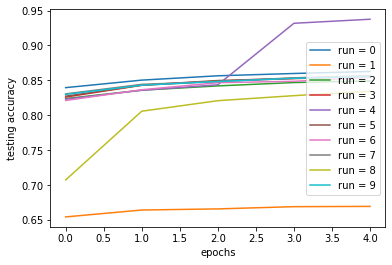

In [0]:
for i in range(run):
    plt.plot(accTrain[i], label = 'run = ' + str(i))

plt.ylabel('testing accuracy')
plt.xlabel('epochs')
plt.legend()

**The difference between different runs is due to the randomness existing in (1) weight matrix initialization and (2) batch selection in each epoch**

**2. [1 mark]:** Do the same thing as question 1, but train for 20 epochs.  Plot the training error vs epochs for 10 different runs on one plot.  On a separate plot show the testing error vs epochs for the 10 different runs.  How does the testing error compare to the training error?  Do the models all eventually learn to solve the problem well?  What happens to them?

In [0]:
run = 10 

errTrain = []
errTest = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'relu')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1),
                 loss = my_loss,
                 metrics = ['accuracy'])
    
    model.fit(x_train, y_train_target, epochs=20, validation_data = (x_test, y_test_target));
    
    errTrain.append(model.history.history['loss'])
    errTest.append(model.history.history['val_loss'])

run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0376 - acc: 0.7581 - val_loss: 0.0278 - val_acc: 0.8228
Epoch 2/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0267 - acc: 0.8316 - val_loss: 0.0248 - val_acc: 0.8389
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0244 - acc: 0.8427 - val_loss: 0.0234 - val_acc: 0.8440
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0230 - acc: 0.8490 - val_loss: 0.0223 - val_acc: 0.8488
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0221 - acc: 0.8531 - val_loss: 0.0218 - val_acc: 0.8530
Epoch 6/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0214 - acc: 0.8562 - val_loss: 0.0212 - val_acc: 0.8544
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0208 - acc: 0.8594

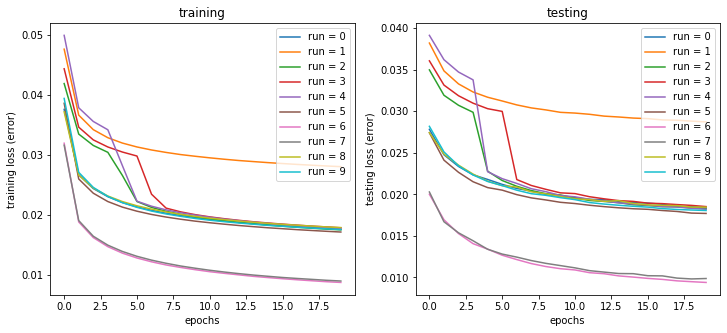

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(errTrain[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(errTest[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

**Test error is more than training error; Yes. the models can solve the problem with the error between 1%-3% error.** 

**3. [1 mark]:** Repeat question 2 (generating the same 2 plots), but with a learning rate of 0.01.  How does this affect the learning performance?

In [0]:
run = 10 

errTrain_ = []
errTest_ = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'relu')  
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.01),
                 loss = my_loss,
                 metrics = ['accuracy'])
    
    model.fit(x_train, y_train_target, epochs=20, validation_data = (x_test, y_test_target));
    
    errTrain_.append(model.history.history['loss'])
    errTest_.append(model.history.history['val_loss'])

run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0678 - acc: 0.5002 - val_loss: 0.0479 - val_acc: 0.6928
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0439 - acc: 0.7191 - val_loss: 0.0398 - val_acc: 0.7470
Epoch 3/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0392 - acc: 0.7500 - val_loss: 0.0369 - val_acc: 0.7628
Epoch 4/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0369 - acc: 0.7643 - val_loss: 0.0352 - val_acc: 0.7735
Epoch 5/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0353 - acc: 0.7749 - val_loss: 0.0340 - val_acc: 0.7831
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0338 - acc: 0.7880 - val_loss: 0.0316 - val_acc: 0.8156
Epoch 7/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0287 - acc: 0.8520

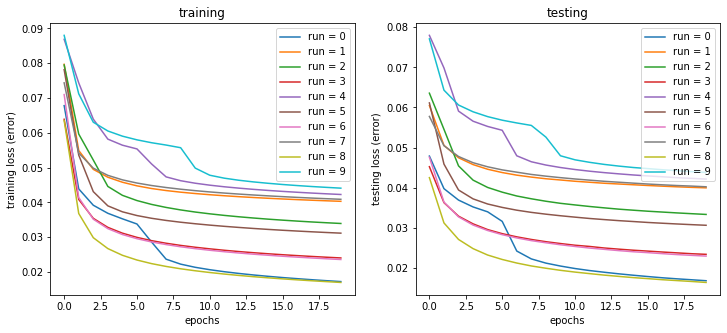

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(errTrain_[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(errTest_[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

**The ultimate error is more than the previous question when using smaller learning rate. The model learns slower with smaller learning rate.** 

**4. [1 mark]:** Instead of standard Stochastic Gradient Descent, most modern machine learning researchers use a variation of it called Adam that automatically adjusts the learning rate and does a better local estimate of the gradient.  We can switch to this by changing `optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)` to `optimizer="adam"`.  Repeat question 2 (generating the same 2 plots) using the Adam optimizer.  How does this affect the learning performance?

In [0]:
run = 10 

errTrain_adam = []
errTest_adam = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'relu')  
    ])
    
    model.compile(optimizer='adam',
                 loss = my_loss,
                 metrics = ['accuracy'])
    
    model.fit(x_train, y_train_target, epochs=20, validation_data = (x_test, y_test_target));
    
    errTrain_adam.append(model.history.history['loss'])
    errTest_adam.append(model.history.history['val_loss'])

run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0269 - acc: 0.8256 - val_loss: 0.0199 - val_acc: 0.8678
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0150 - acc: 0.9194 - val_loss: 0.0114 - val_acc: 0.9530
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0101 - acc: 0.9582 - val_loss: 0.0096 - val_acc: 0.9594
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0089 - acc: 0.9637 - val_loss: 0.0096 - val_acc: 0.9567
Epoch 5/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0082 - acc: 0.9665 - val_loss: 0.0084 - val_acc: 0.9646
Epoch 6/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0076 - acc: 0.9689 - val_loss: 0.0084 - val_acc: 0.9629
Epoch 7/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0072 - acc: 0.9714

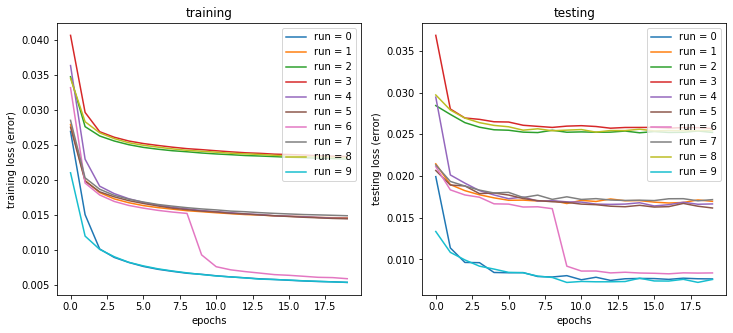

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(errTrain_adam[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(errTest_adam[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

**The difference is noticable when using adam optimizer instead of SGD. The SGD-based model with best performance had 2% error; however, with adam optimizer we ended up more accurate model with only 0.5% error.**

**5. [1 mark]**: To improve performance, we can also change the output layer of neurons to be a `softmax` layer.  This means that they will automatically be normalized with the softmax function (so the output of neuron $i$ will be ${e^{a_i} / \sum_j e^{a_j}}$).  This should push the output value closer to the sort of output we want (all zeros with a single 1).  Furthermore, instead of doing the error as $(t-y)^2$, we can instead choose an error function that is only concerned about categorization.  After all, the only thing we care about when categorizing is which of the outputs is largest, not whether they are exactly 0 or 1.  Conveniently, tensorflow (and many other deep learning libraries) also contains a version of this function that works directly on category labels, so we don't have to do the `y_train_target = np.eye(10)[y_train]` trick in the code above.  The resulting network looks like this:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
  tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
  tf.keras.layers.Dense(10, activation='softmax')  # 10 outputs (one for each category)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3622 - acc: 0.8999 - val_loss: 0.2158 - val_acc: 0.9398
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1875 - acc: 0.9464 - val_loss: 0.1629 - val_acc: 0.9525
Epoch 3/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1450 - acc: 0.9572 - val_loss: 0.1359 - val_acc: 0.9596
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1232 - acc: 0.9643 - val_loss: 0.1271 - val_acc: 0.9610
Epoch 5/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1075 - acc: 0.9672 - val_loss: 0.1198 - val_acc: 0.9651
Epoch 6/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0950 - acc: 0.9715 - val_loss: 0.1155 - val_acc: 0.9661
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0863 - acc: 0.9737 - val_loss: 0.

Generate the same 2 plots as in question 2.  How do these changes affect the learning performance?

In [0]:
run = 10 

errTrain_soft = []
errTest_soft = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'softmax')  
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
    model.fit(x_train, y_train, epochs=20, validation_data = (x_test, y_test));
    
    errTrain_soft.append(model.history.history['loss'])
    errTest_soft.append(model.history.history['val_loss'])

run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3674 - acc: 0.8963 - val_loss: 0.2234 - val_acc: 0.9339
Epoch 2/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1907 - acc: 0.9444 - val_loss: 0.1681 - val_acc: 0.9515
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1482 - acc: 0.9566 - val_loss: 0.1437 - val_acc: 0.9562
Epoch 4/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1246 - acc: 0.9637 - val_loss: 0.1268 - val_acc: 0.9599
Epoch 5/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1079 - acc: 0.9679 - val_loss: 0.1212 - val_acc: 0.9632
Epoch 6/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0972 - acc: 0.9708 - val_loss: 0.1106 - val_acc: 0.9655
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0871 - acc: 0.9740

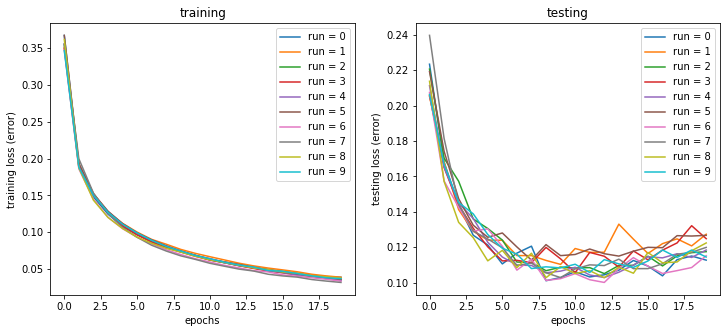

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(errTrain_soft[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(errTest_soft[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

**The network shows interesting behaviour. It doesn’t matter what the initial random weight is; all models ultimately approach good enough local optimum. In previous question the model with best performance had 0.5% error; however, some models had error in the range of 2%. In this question models are less sensitive to randomness and all have the error in the range of ~1%. However in the current network, for test loss/accuracy there is more fluctiation in the late epochs.**       

**6. [2 marks]:** Using the final version of the model (from question 5), explore the performance of the model as you change the number of neurons in the hidden layer.  Try 2, 4, 8, 16, 32, 64, 128, and 256.  For each value, train 10 models for 10 epochs each.  We do not need the testing accuracy over the epochs, so you can switch back to setting `epochs=10` rather than using the `for` loop.  Plot the average training accuracy vs different numbers of neurons.  On a separate plot, plot the average testing accuracy vs different numbers of neurons.  What trend do you observe?

In [0]:
n_hidden = [2, 4, 8, 16, 32, 64, 128, 256]
run = 10 

accTrain = []
accTest = []

accTrain_ave = []
accTest_ave = []

for h in n_hidden:
    for r in range(run):
        print('hidden nodes number: ', h)
        print('run number: ', r)
        model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(h, activation = 'relu'), 
          tf.keras.layers.Dense(10, activation = 'softmax')  
        ])

        model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                 )

        model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));

        accTrain.append(model.history.history['acc'][-1])
        accTest.append(model.history.history['val_acc'][-1])
    
    accTrain_ave.append(np.array(accTrain).mean())
    accTest_ave.append(np.array(accTest).mean())

hidden nodes number:  2
run number:  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 1.7379 - acc: 0.3228 - val_loss: 1.5380 - val_acc: 0.4332
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1.3723 - acc: 0.4841 - val_loss: 1.2691 - val_acc: 0.5041
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1.2100 - acc: 0.5717 - val_loss: 1.1395 - val_acc: 0.6116
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1.1151 - acc: 0.6224 - val_loss: 1.0752 - val_acc: 0.6444
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.0716 - acc: 0.6448 - val_loss: 1.0485 - val_acc: 0.6542
Epoch 6/10
60000/60000 [==============================] - 4s 58us/sample - loss: 1.0460 - acc: 0.6524 - val_loss: 1.0348 - val_acc: 0.6556
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - lo

No handles with labels found to put in legend.
No handles with labels found to put in legend.


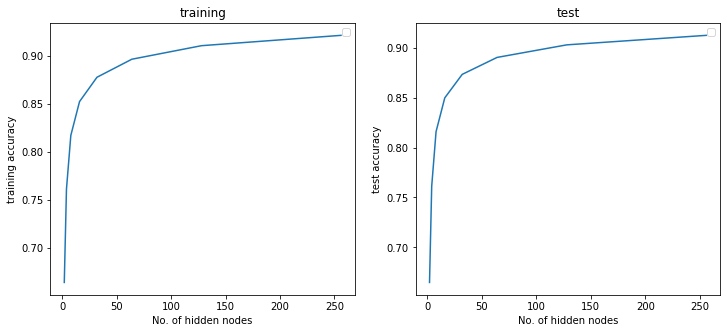

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  
plt.plot(n_hidden, accTrain_ave)
    
plt.xlabel('No. of hidden nodes')
plt.ylabel('training accuracy')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_hidden, accTest_ave)
    
plt.xlabel('No. of hidden nodes')
plt.ylabel('test accuracy')
plt.title('test')
plt.legend()

**Increasing trend has been observed. The following figure shows that we do not have overfitting even with a hidden layer with 256 neurons.** 

Max. Training accuracy:  0.92123187
Max. Test accuracy:  0.91232127


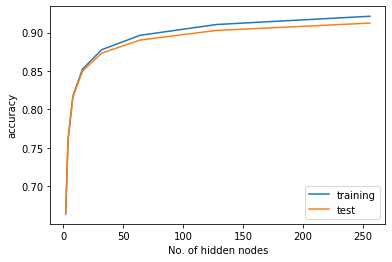

In [0]:
plt.plot(n_hidden, accTrain_ave, label = 'training')
plt.plot(n_hidden, accTest_ave, label = 'test')

plt.xlabel('No. of hidden nodes')
plt.ylabel('accuracy')
plt.legend()

print('Max. Training accuracy: ', np.max(accTrain_ave))
print('Max. Test accuracy: ', np.max(accTest_ave))

**7. [2 marks]:** The overall goal is to make the network perform as well as possible on the testing data.  What would you do if your job was to make the best possible network for this task?  Try some things and report your results.  For example, try adding a second hidden layer to the model.  Try making it different sizes. What about having no hidden layer?  Or more than 2?  Report the results of your exploration.

**7.a. Study the effect of network depth**

Changing the number of 32-node hidden layers- from 0 to 18 hidden layers

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_206 (Dense)            (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


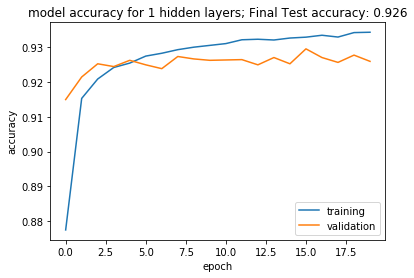

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_207 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_208 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


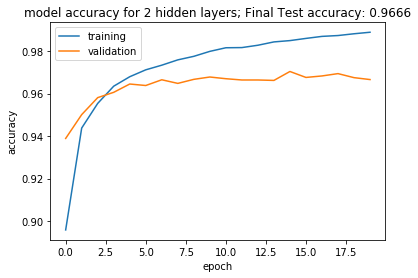

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_209 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_210 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_211 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


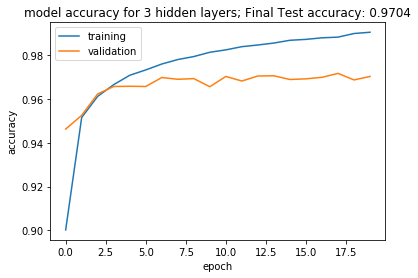

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_212 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_213 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_214 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_215 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


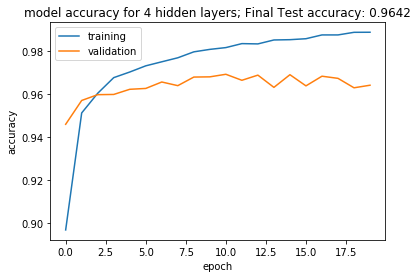

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_216 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_217 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_218 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_219 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_220 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________

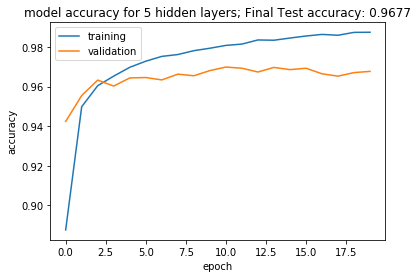

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_221 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_222 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_223 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_224 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_225 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_226 (Dense)            (None, 10)              

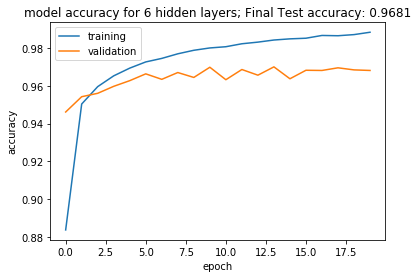

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_227 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_228 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_229 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_230 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_231 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_232 (Dense)            (None, 32)              

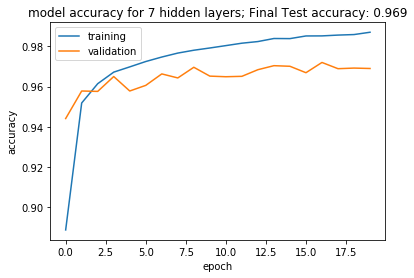

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_234 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_235 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_236 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_237 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_238 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_239 (Dense)            (None, 32)              

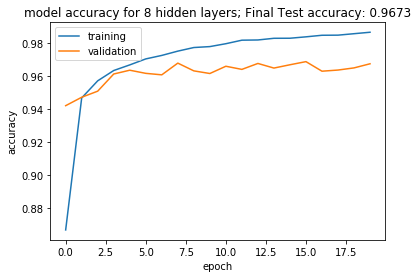

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_242 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_243 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_244 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_245 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_246 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_247 (Dense)            (None, 32)              

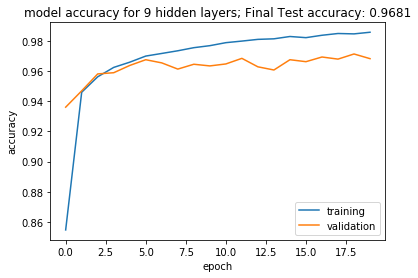

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_252 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_253 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_254 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_255 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_256 (Dense)            (None, 32)              

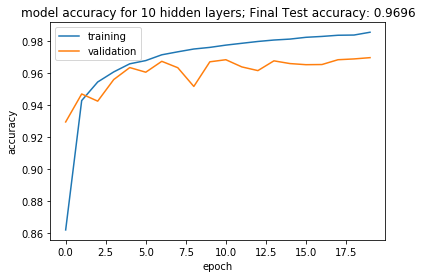

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_261 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_262 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_263 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_264 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_265 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_266 (Dense)            (None, 32)              

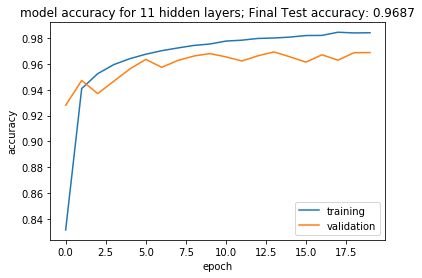

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_272 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_275 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_276 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_277 (Dense)            (None, 32)              

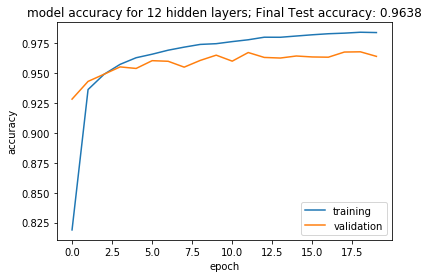

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_284 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_285 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_286 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_287 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_288 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_289 (Dense)            (None, 32)              

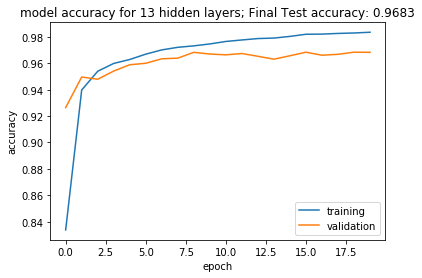

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_297 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_298 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_299 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_300 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_301 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_302 (Dense)            (None, 32)              

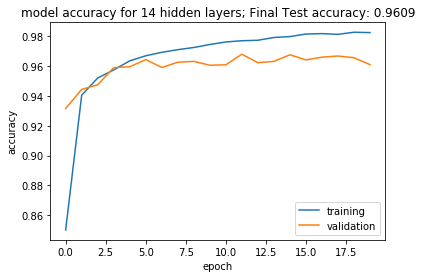

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_311 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_312 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_313 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_314 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_315 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_316 (Dense)            (None, 32)              

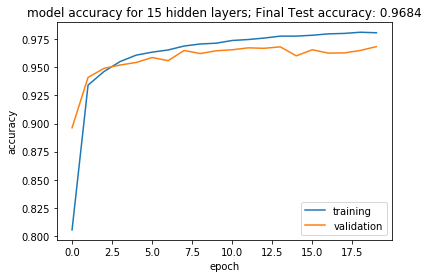

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_39 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_326 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_327 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_328 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_329 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_330 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_331 (Dense)            (None, 32)              

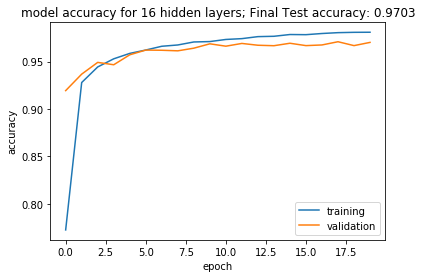

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_342 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_343 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_344 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_345 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_346 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_347 (Dense)            (None, 32)              

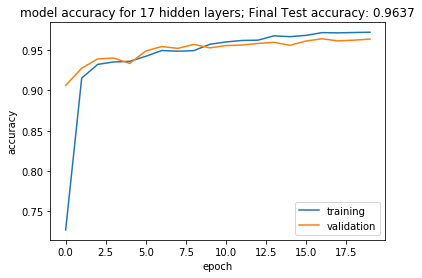

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_359 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_360 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_361 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_362 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_363 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_364 (Dense)            (None, 32)              

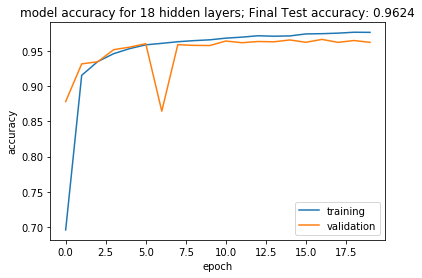

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_378 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_379 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_380 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_381 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_382 (Dense)            (None, 32)              

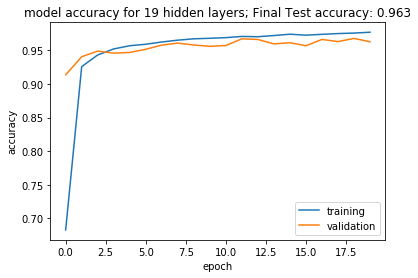

In [0]:
for layers in range(1, 20):
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28))])
  
  for i in range(1, layers):
    model.add (tf.keras.layers.Dense(32, activation = 'relu'))
    
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))     

  model.summary()
  model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
             )

  model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test), verbose=False)   

  plt.plot(model.history.history['acc'])
  plt.plot(model.history.history['val_acc'])
  plt.title('model accuracy for ' + str(layers - 1) + 
            ' hidden layers; Final Test accuracy: ' +  
            str(model.history.history['val_acc'][-1])) 
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc = 'best')
  plt.show()
  

**7.b. Study the effect of network width**

Changing the number of 64-node hidden layers- from 0 to 4 hidden layers.

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_49 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


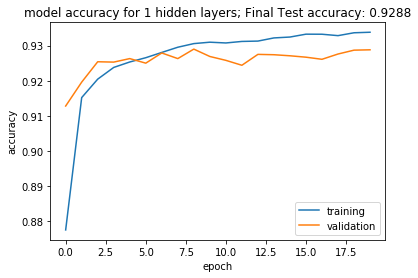

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_134 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


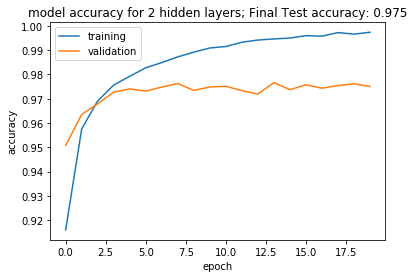

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_51 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_136 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_137 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


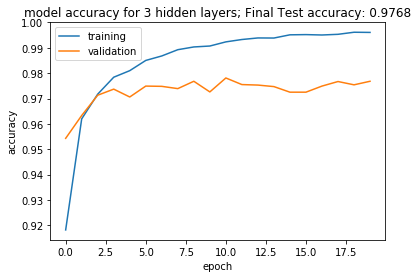

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_52 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_139 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_140 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_141 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


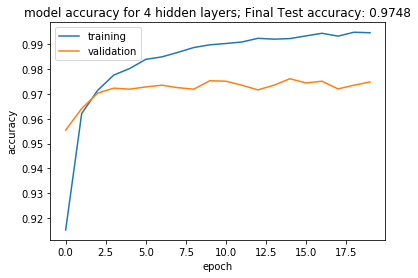

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_53 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_143 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_144 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_145 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_146 (Dense)            (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________

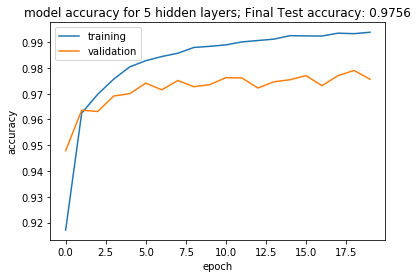

In [0]:
for layers in range(1, 6):
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28))])
  
  for i in range(1, layers):
    model.add (tf.keras.layers.Dense(64, activation = 'relu'))
    
  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))     

  model.summary()
  model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
             )

  model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test), verbose=False)   

  plt.plot(model.history.history['acc'])
  plt.plot(model.history.history['val_acc'])
  plt.title('model accuracy for ' + str(layers - 1) + 
            ' hidden layers; Final Test accuracy: ' +  
            str(model.history.history['val_acc'][-1])) 
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc = 'best')
  plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


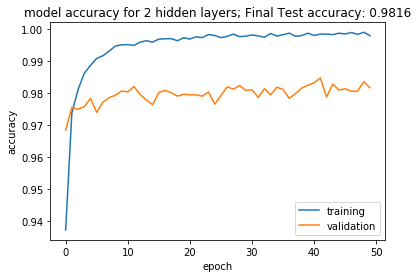

In [0]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape = (28, 28))])
model.add (tf.keras.layers.Dense(256, activation = 'relu'))
model.add (tf.keras.layers.Dense(128, activation = 'relu'))   
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))     

model.summary()
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
             )

model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), verbose=False)   

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy for ' + str(2) + 
            ' hidden layers; Final Test accuracy: ' +  
            str(model.history.history['val_acc'][-1])) 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc = 'best')
plt.show()

**7.c. Changing the network depth and width together**

Using multiple hidden layers with dicreasing pattern in number of neurons

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_400 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_401 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_402 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_403 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_404 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_405 (Dense)            (None, 10)              

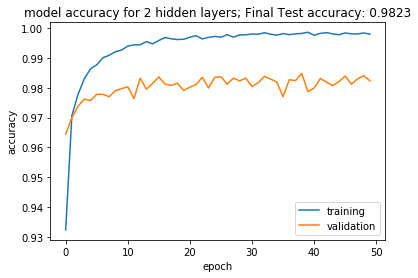

In [0]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape = (28, 28))])
model.add (tf.keras.layers.Dense(512, activation = 'relu'))
model.add (tf.keras.layers.Dense(256, activation = 'relu'))
model.add (tf.keras.layers.Dense(128, activation = 'relu'))
model.add (tf.keras.layers.Dense(64, activation = 'relu')) 
model.add (tf.keras.layers.Dense(32, activation = 'relu'))     
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))     

model.summary()
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
             )

model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), verbose=False)   

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy for ' + str(2) + 
            ' hidden layers; Final Test accuracy: ' +  
            str(model.history.history['val_acc'][-1])) 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc = 'best')
plt.show()

**Discussion (Q.7):**

When we have no hidden layer our accuracy (~.92) in lower than the cases that we have hidden layers. 

Adding one 32-node hidden layer will increase the accuracy to ~0.97. However adding more 32-node hidden layers (from 2 layers to 18 layers) does not have any noticible effect on improving accuracy. Even adding layers more than 15 will cause the model to overfit. 

Adding neurons to hidden layer (from 32 to 64 to 32 to 16) improves the accuracy quit a little bit (still in the order of ~0.97).

The final expreiment was adding three hidden layers with decreasing ttrend (from 256 to 128 to 64 to 32) which has improved the accuracy up to 0.98. 

## Part 2: CIFAR-10
The CIFAR-10 dataset is a bit harder than the MNIST dataset.  Like MNIST, it consists of 10 categories of images, but now they are colour images and they are of different types of objects.

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Scale pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
y_test = y_test[:,0]

170500096/170498071 [==============================] - 8s 0us/step


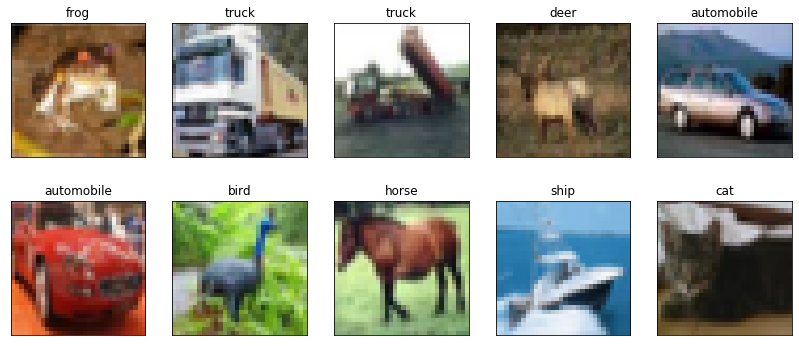

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(names[int(y_train[i])])
plt.show()

**8. [2 marks]:** Try using the same model as we used for the MNIST (question 5) task to categorize these images.  You will need to change `input_shape=(28, 28)` to `input_shape=(32, 32, 3)`, as these are now colour images of a different size.  Use 32 neurons in the hidden layer and train for 10 epochs.  Do this 10 times and plot the training accuracy and testing accuracy.  How well does the model perform?  Try increasing the number of hidden layer neurons (pick a number of neurons that seems reasonable given how much computer processing power you have).  How much does the system improve?

In [0]:
run = 10 

accTrain = []
accTest = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
      tf.keras.layers.Dense(32, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'softmax')  
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
    model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
    accTrain.append(model.history.history['acc'])
    accTest.append(model.history.history['val_acc'])

run number:  0
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 319us/sample - loss: 1.9929 - acc: 0.2429 - val_loss: 1.8864 - val_acc: 0.2836
Epoch 2/10
50000/50000 [==============================] - 13s 263us/sample - loss: 1.8824 - acc: 0.2928 - val_loss: 1.8694 - val_acc: 0.2996
Epoch 3/10
50000/50000 [==============================] - 13s 262us/sample - loss: 1.8626 - acc: 0.3096 - val_loss: 1.8415 - val_acc: 0.3211
Epoch 4/10
50000/50000 [==============================] - 14s 270us/sample - loss: 1.8477 - acc: 0.3187 - val_loss: 1.8343 - val_acc: 0.3294
Epoch 5/10
50000/50000 [==============================] - 14s 285us/sample - loss: 1.8411 - acc: 0.3265 - val_loss: 1.8783 - val_acc: 0.3079
Epoch 6/10
50000/50000 [==============================] - 14s 287us/sample - loss: 1.8306 - acc: 0.3308 - val_loss: 1.8179 - val_acc: 0.3395
Epoch 7/10
50000/50000 [==============================] - 14s 288us/sample - loss: 1.8241

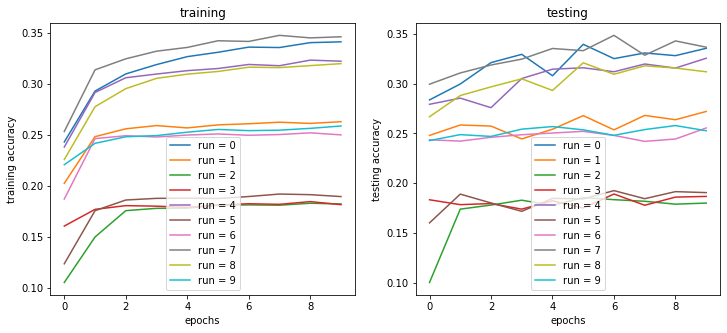

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(accTrain[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(accTest[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

In [0]:
run = 10 

accTrain = []
accTest = []

for i in range(run):
    print('run number: ', i)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
      tf.keras.layers.Dense(128, activation = 'relu'), 
      tf.keras.layers.Dense(10, activation = 'softmax')  
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
    model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
    accTrain.append(model.history.history['acc'])
    accTest.append(model.history.history['val_acc'])

run number:  0
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 386us/sample - loss: 1.9125 - acc: 0.3143 - val_loss: 1.7702 - val_acc: 0.3663
Epoch 2/10
50000/50000 [==============================] - 18s 352us/sample - loss: 1.7602 - acc: 0.3703 - val_loss: 1.6995 - val_acc: 0.3933
Epoch 3/10
50000/50000 [==============================] - 17s 347us/sample - loss: 1.6991 - acc: 0.3920 - val_loss: 1.6544 - val_acc: 0.4116
Epoch 4/10
50000/50000 [==============================] - 17s 338us/sample - loss: 1.6561 - acc: 0.4119 - val_loss: 1.6705 - val_acc: 0.4009
Epoch 5/10
50000/50000 [==============================] - 18s 357us/sample - loss: 1.6306 - acc: 0.4196 - val_loss: 1.6803 - val_acc: 0.4053
Epoch 6/10
50000/50000 [==============================] - 18s 357us/sample - loss: 1.6149 - acc: 0.4257 - val_loss: 1.6082 - val_acc: 0.4266
Epoch 7/10
50000/50000 [==============================] - 17s 349us/sample - loss: 1.5970

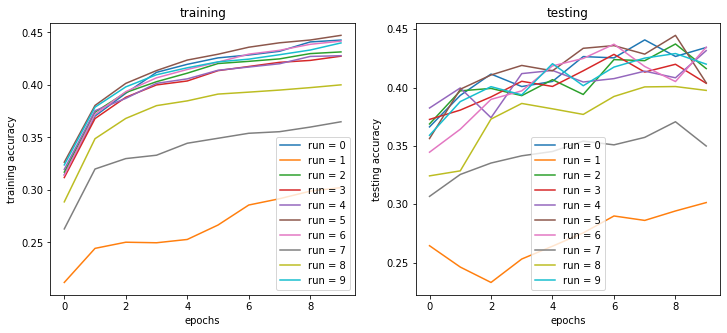

In [0]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(accTrain[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(accTest[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**The best accuracy with 32-node hidden layer is 35%. Increasing the number of neurons of hidden layer to 128 has improved the accuracy by 10% (~45%).**

**9. [2 marks]:** To solve this task, let's try adding more layers.  In particular, let's add convolutional layers.  Here is a good network structure to start with:

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),    
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Train this network for 10 epochs, and do this 10 times and plot the training and testing accorcay.  How well does the model perform?  

In [0]:
run = 10 

accTrain = []
accTest = []

for i in range(run):
  print('run number: ', i)
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
    
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
  model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
  accTrain.append(model.history.history['acc'])
  accTest.append(model.history.history['val_acc'])

run number:  0
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 272us/sample - loss: 1.5129 - acc: 0.4455 - val_loss: 1.2635 - val_acc: 0.5455
Epoch 2/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.1518 - acc: 0.5940 - val_loss: 1.0463 - val_acc: 0.6287
Epoch 3/10
50000/50000 [==============================] - 7s 147us/sample - loss: 0.9926 - acc: 0.6525 - val_loss: 0.9573 - val_acc: 0.6693
Epoch 4/10
50000/50000 [==============================] - 7s 148us/sample - loss: 0.8911 - acc: 0.6886 - val_loss: 0.9075 - val_acc: 0.6807
Epoch 5/10
50000/50000 [==============================] - 7s 149us/sample - loss: 0.8176 - acc: 0.7150 - val_loss: 0.8881 - val_acc: 0.6933
Epoch 6/10
50000/50000 [==============================] - 7s 149us/sample - loss: 0.7547 - acc: 0.7352 - val_loss: 0.8617 - val_acc: 0.7026
Epoch 7/10
50000/50000 [==============================] - 8s 150us/sample - loss: 0.7039 - acc

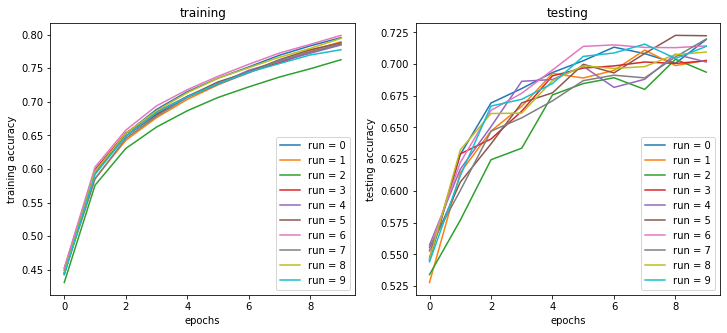

In [0]:
import matplotlib.pyplot as plt
   
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for i in range(run):   
    plt.plot(accTrain[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('training')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(run):
    plt.plot(accTest[i], label = 'run = ' + str(i))
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

we have reached from 40-45% accuracy of multi-layer neural network to 70-72% by adding convolutional layers. 

**10. [2 marks]:** Improve the model as much as you can.  Remember that the goal is to increase the testing accuracy, not the training accuracy (after all, if we wanted perfect training accuracy, we could just write code that just memorizes all the training data and uses it as a lookup table).  Report what things you tried and how much they helped (or did not help).

**10.a. Change:** activation function

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_sigmoid = model.history.history['acc']
accTest_sigmoid = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 2.0534 - acc: 0.2309 - val_loss: 1.8095 - val_acc: 0.3478
Epoch 2/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.6690 - acc: 0.4012 - val_loss: 1.5673 - val_acc: 0.4324
Epoch 3/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.5165 - acc: 0.4532 - val_loss: 1.4571 - val_acc: 0.4772
Epoch 4/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.4308 - acc: 0.4848 - val_loss: 1.4089 - val_acc: 0.4978
Epoch 5/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.3645 - acc: 0.5093 - val_loss: 1.3841 - val_acc: 0.5006
Epoch 6/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.3085 - acc: 0.5315 - val_loss: 1.3068 - val_acc: 0.5303
Epoch 7/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.2607 - acc: 0.5485 - val_loss: 1.

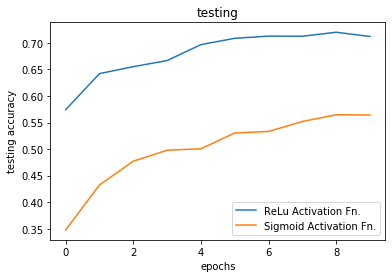

In [0]:
plt.plot(accTest[6], label = 'ReLu Activation Fn.')
plt.plot(accTest_sigmoid, label = 'Sigmoid Activation Fn.')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.a. Result:** Did not help. ReLu activation function does better than Sigmoid.

**10.b. Change:** Adding Dropout after Pooling

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
                            
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
                            
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_drop = model.history.history['acc']
accTest_drop = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.5569 - acc: 0.4307 - val_loss: 1.3002 - val_acc: 0.5304
Epoch 2/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.2181 - acc: 0.5688 - val_loss: 1.0835 - val_acc: 0.6171
Epoch 3/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.0762 - acc: 0.6206 - val_loss: 0.9955 - val_acc: 0.6512
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.9896 - acc: 0.6522 - val_loss: 0.9078 - val_acc: 0.6894
Epoch 5/10
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.9227 - acc: 0.6727 - val_loss: 0.9473 - val_acc: 0.6678
Epoch 6/10
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.8775 - acc: 0.6920 - val_loss: 0.8913 - val_acc: 0.6891
Epoch 7/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.8415 - acc: 0.7060 - val_loss: 0.

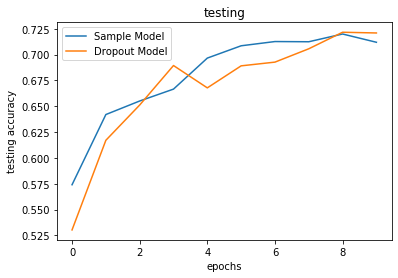

In [0]:
plt.plot(accTest[6], label = 'Sample Model')
plt.plot(accTest_drop, label = 'Dropout Model')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.b. Result:** Helped. The final test accuracy became better after 10 epochs.

**10.c. Change:** adding more Conv. layers.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
                            
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_layer = model.history.history['acc']
accTest_layer = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 1.6666 - acc: 0.3822 - val_loss: 1.3626 - val_acc: 0.5075
Epoch 2/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 1.2255 - acc: 0.5594 - val_loss: 1.1178 - val_acc: 0.5942
Epoch 3/10
50000/50000 [==============================] - 191s 4ms/sample - loss: 1.0700 - acc: 0.6186 - val_loss: 0.9955 - val_acc: 0.6434
Epoch 4/10
50000/50000 [==============================] - 190s 4ms/sample - loss: 0.9668 - acc: 0.6572 - val_loss: 0.9095 - val_acc: 0.6773
Epoch 5/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.8920 - acc: 0.6851 - val_loss: 0.8624 - val_acc: 0.7017
Epoch 6/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.8413 - acc: 0.7027 - val_loss: 0.8173 - val_acc: 0.7154
Epoch 7/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.8046 - acc: 0.7143 - val_l

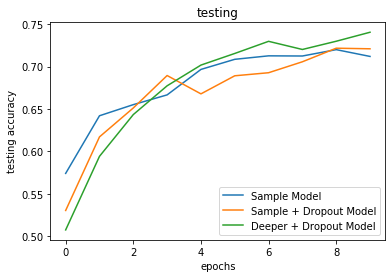

In [0]:
plt.plot(accTest[6], label = 'Sample Model')
plt.plot(accTest_drop, label = 'Sample + Dropout Model')
plt.plot(accTest_layer, label = 'Deeper + Dropout Model')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.c. Result:** Helped. Deeper network performs better.

**10.d. Change:** Filter Size

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_filter = model.history.history['acc']
accTest_filter = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.5336 - acc: 0.4351 - val_loss: 1.2848 - val_acc: 0.5463
Epoch 2/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.1865 - acc: 0.5776 - val_loss: 1.1068 - val_acc: 0.6059
Epoch 3/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.0444 - acc: 0.6340 - val_loss: 1.0138 - val_acc: 0.6511
Epoch 4/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.9544 - acc: 0.6657 - val_loss: 0.9950 - val_acc: 0.6530
Epoch 5/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.8814 - acc: 0.6912 - val_loss: 0.9819 - val_acc: 0.6642
Epoch 6/10
50000/50000 [==============================] - 102s 2ms/sample - loss: 0.8190 - acc: 0.7135 - val_loss: 0.9509 - val_acc: 0.6726
Epoch 7/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.7704 - acc: 0.7298 - val_l

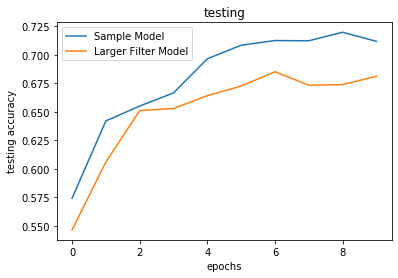

In [0]:
plt.plot(accTest[6], label = 'Sample Model')
plt.plot(accTest_filter, label = 'Larger Filter Model')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.d. Result:** It did not help. Smaller filter size was better.

**10.e. Change:** Optimizer type

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_adagrad = model.history.history['acc']
accTest_adagrad = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.8610 - acc: 0.3251 - val_loss: 1.7308 - val_acc: 0.3796
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.6942 - acc: 0.3928 - val_loss: 1.6582 - val_acc: 0.4050
Epoch 3/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.6314 - acc: 0.4161 - val_loss: 1.6071 - val_acc: 0.4267
Epoch 4/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.5876 - acc: 0.4334 - val_loss: 1.5784 - val_acc: 0.4393
Epoch 5/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.5536 - acc: 0.4458 - val_loss: 1.5451 - val_acc: 0.4498
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.5263 - acc: 0.4555 - val_loss: 1.5180 - val_acc: 0.4593
Epoch 7/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.5041 - acc: 0.4634 - val_loss: 1.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_RMSprop = model.history.history['acc']
accTest_RMSprop = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.8250 - acc: 0.3410 - val_loss: 1.7189 - val_acc: 0.3915
Epoch 2/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.5341 - acc: 0.4468 - val_loss: 1.4665 - val_acc: 0.4710
Epoch 3/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.4200 - acc: 0.4926 - val_loss: 1.4245 - val_acc: 0.4905
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.3423 - acc: 0.5244 - val_loss: 1.3425 - val_acc: 0.5216
Epoch 5/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.2762 - acc: 0.5477 - val_loss: 1.2588 - val_acc: 0.5542
Epoch 6/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.2191 - acc: 0.5685 - val_loss: 1.2302 - val_acc: 0.5630
Epoch 7/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.1685 - acc: 0.5877 - val_loss: 1.

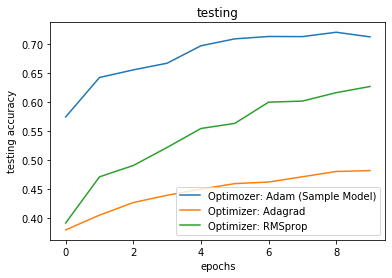

In [0]:
plt.plot(accTest[6], label = 'Optimozer: Adam (Sample Model)')
plt.plot(accTest_adagrad, label = 'Optimizer: Adagrad')
plt.plot(accTest_RMSprop, label = 'Optimizer: RMSprop')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.e. Result:** It did not help. Adam optimizer is the best. 

**10.f. Change:** padding

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_pad = model.history.history['acc']
accTest_pad = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.4022 - acc: 0.4916 - val_loss: 1.1572 - val_acc: 0.5977
Epoch 2/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.0051 - acc: 0.6467 - val_loss: 0.9671 - val_acc: 0.6663
Epoch 3/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.8527 - acc: 0.7006 - val_loss: 0.8475 - val_acc: 0.7056
Epoch 4/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.7495 - acc: 0.7370 - val_loss: 0.8150 - val_acc: 0.7153
Epoch 5/10
50000/50000 [==============================] - 113s 2ms/sample - loss: 0.6757 - acc: 0.7628 - val_loss: 0.8264 - val_acc: 0.7134
Epoch 6/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.5981 - acc: 0.7902 - val_loss: 0.8054 - val_acc: 0.7285
Epoch 7/10
50000/50000 [==============================] - 114s 2ms/sample - loss: 0.5454 - acc: 0.8076 - val_l

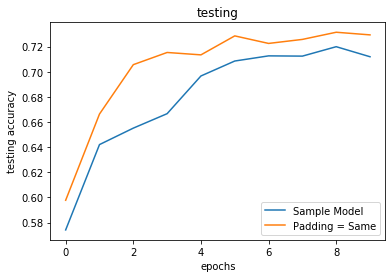

In [0]:
plt.plot(accTest[6], label = 'Sample Model')
plt.plot(accTest_pad, label = 'Padding = Same')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.f. Result:** It helped. Changing the padding to 'same' makes the performance better.

**10.g. Change:** the number of neurons in the last hidden layer

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_dense = model.history.history['acc']
accTest_dense = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.5159 - acc: 0.4472 - val_loss: 1.2017 - val_acc: 0.5688
Epoch 2/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.1574 - acc: 0.5889 - val_loss: 1.1317 - val_acc: 0.5968
Epoch 3/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.0192 - acc: 0.6389 - val_loss: 0.9749 - val_acc: 0.6561
Epoch 4/10
50000/50000 [==============================] - 8s 164us/sample - loss: 0.9275 - acc: 0.6761 - val_loss: 0.9049 - val_acc: 0.6865
Epoch 5/10
50000/50000 [==============================] - 8s 162us/sample - loss: 0.8501 - acc: 0.6998 - val_loss: 0.8839 - val_acc: 0.6948
Epoch 6/10
50000/50000 [==============================] - 8s 164us/sample - loss: 0.7917 - acc: 0.7235 - val_loss: 0.8548 - val_acc: 0.7047
Epoch 7/10
50000/50000 [==============================] - 8s 163us/sample - loss: 0.7373 - acc: 0.7405 - val_l

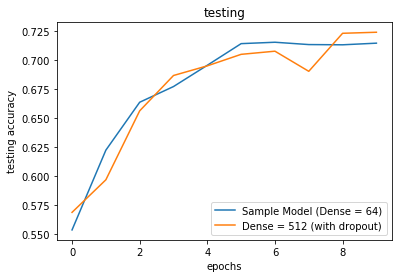

In [0]:
plt.plot(accTest[6], label = 'Sample Model (Dense = 64)')
plt.plot(accTest_dense, label = 'Dense = 512 (with dropout)')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()

**10.g. Result:** It helped.

**10.h. Change:** Combining all positive changes (i.e., deeper network with dropout, padding: 'same', more neurons in the last hidden layer)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
                            
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test));
    
accTrain_final = model.history.history['acc']
accTest_final = model.history.history['val_acc']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 223us/sample - loss: 1.5317 - acc: 0.4370 - val_loss: 1.1148 - val_acc: 0.5958
Epoch 2/10
50000/50000 [==============================] - 10s 209us/sample - loss: 1.0853 - acc: 0.6184 - val_loss: 0.9888 - val_acc: 0.6573
Epoch 3/10
50000/50000 [==============================] - 10s 207us/sample - loss: 0.9251 - acc: 0.6760 - val_loss: 0.8949 - val_acc: 0.6841
Epoch 4/10
50000/50000 [==============================] - 11s 220us/sample - loss: 0.8271 - acc: 0.7099 - val_loss: 0.7596 - val_acc: 0.7399
Epoch 5/10
50000/50000 [==============================] - 10s 209us/sample - loss: 0.7663 - acc: 0.7337 - val_loss: 0.8041 - val_acc: 0.7221
Epoch 6/10
50000/50000 [==============================] - 10s 209us/sample - loss: 0.7090 - acc: 0.7507 - val_loss: 0.7283 - val_acc: 0.7508
Epoch 7/10
50000/50000 [==============================] - 11s 212us/sample - loss: 0.6660 - acc: 0.7681 

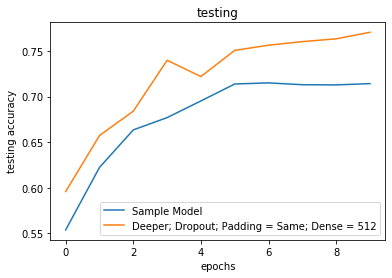

In [0]:
 plt.plot(accTest[6], label = 'Sample Model')
plt.plot(accTest_final, label = 'Deeper; Dropout; Padding = Same; Dense = 512')
    
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
plt.title('testing')
plt.legend()